## Load libraries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import requests

import warnings
warnings.filterwarnings('ignore')

In /home/prockwood/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prockwood/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prockwood/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/prockwood/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prockwood/anaconda3/lib/python3.8/site-

In [78]:
songs_df = pd.read_csv('genres_v2.csv')

## Look at df

In [3]:
songs_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.0134,0.0556,0.389,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.0000,0.1180,0.124,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN


In [4]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
songs_df['song_name'].nunique() #drop type, id, uri, track_href, analysis_uri, song_name?, 

15439

In [6]:
songs_df['Unnamed: 0'].unique

<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
42300    20995.0
42301    20996.0
42302    20997.0
42303    20998.0
42304    20999.0
Name: Unnamed: 0, Length: 42305, dtype: float64>

In [7]:
def MissingUniqueStatistics(df): #from a kaggle EDA tutorial
  
  total_entry_list = []
  total_missing_value_list = []
  missing_value_ratio_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  variable_name_list = []
  
  for col in df.columns:

    variable_name_list.append(col)
    missing_value_ratio = round((df[col].isna().sum()/len(df[col])),4)
    total_entry_list.append(df[col].shape[0] - df[col].isna().sum())
    total_missing_value_list.append(df[col].isna().sum())
    missing_value_ratio_list.append(missing_value_ratio)
    data_type_list.append(df[col].dtype)
    unique_values_list.append(list(df[col].unique()))
    number_of_unique_values_list.append(len(df[col].unique()))

  data_info_df = pd.DataFrame({'Variable':variable_name_list,'#_Total_Entry':total_entry_list,\
                           '#_Missing_Value':total_missing_value_list,'%_Missing_Value':missing_value_ratio_list,\
                           'Data_Type':data_type_list,'Unique_Values':unique_values_list,\
                           '#_Uniques_Values':number_of_unique_values_list})
  
  return data_info_df.sort_values(by="#_Missing_Value",ascending=False)

In [8]:
MissingUniqueStatistics(songs_df)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
21,title,20780,21525,0.5088,object,"[nan, Dirtybird Players, Tech House Movement, ...",133
20,Unnamed: 0,20780,21525,0.5088,float64,"[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...",20781
19,song_name,21519,20786,0.4913,object,"[Mercury: Retrograde, Pathology, Symbiote, Pro...",15440
1,energy,42305,0,0.0000,float64,"[0.8140000000000001, 0.493, 0.893, 0.780999999...",917
18,genre,42305,0,0.0000,object,"[Dark Trap, Underground Rap, Trap Metal, Emo, ...",15
17,time_signature,42305,0,0.0000,int64,"[4, 3, 5, 1]",4
16,duration_ms,42305,0,0.0000,int64,"[124539, 224427, 98821, 123661, 123298, 112511...",26261
15,analysis_url,42305,0,0.0000,object,[https://api.spotify.com/v1/audio-analysis/2Vc...,35877
14,track_href,42305,0,0.0000,object,[https://api.spotify.com/v1/tracks/2Vc6NJ9PW9g...,35877
13,uri,42305,0,0.0000,object,"[spotify:track:2Vc6NJ9PW9gD9q343XFRKx, spotify...",35877


## Wrangle

In [79]:
def wrangle(df):
    # drop columns not in use by nearest-neighbors 
    df.drop(columns=['type', 'id', 'track_href', 'analysis_url', 'title', 'Unnamed: 0'], inplace=True)
    # drop unuseful audio features
    df.drop(columns=['instrumentalness', 'key', 'time_signature', 'mode'], inplace=True)
    # drop genre, might not work well with nearest-neighbors and does not appear in spotify api request
    df.drop(columns=['genre'], inplace=True)
    
    # making a pool of songs to use as query items
    test_df = df[df['song_name'].isna() == True]
    # dropping rows without song_names, maybe we can keep them if we implement the api calls
    df = df[df['song_name'].isna() == False]
    # drop song-name, not used in nearest-neighbors
    df.drop(columns=['song_name'], inplace=True)
    test_df.drop(columns=['song_name'], inplace=True)
    
    
    return df

In [80]:
df = wrangle(songs_df.copy())

In [81]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,uri,duration_ms
0,0.831,0.814,-7.364,0.4200,0.0598,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,124539
1,0.719,0.493,-7.230,0.0794,0.4010,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,224427
2,0.850,0.893,-4.783,0.0623,0.0138,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,98821
3,0.476,0.781,-4.710,0.1030,0.0237,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,123661
4,0.798,0.624,-7.668,0.2930,0.2170,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,123298


In [82]:
df.to_csv('./clean_genres.csv')

In [50]:
q_df = df.drop(columns=['uri'])

In [12]:
MissingUniqueStatistics(df)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
0,danceability,21519,0,0.0,float64,"[0.831, 0.7190000000000001, 0.85, 0.476, 0.797...",824
1,energy,21519,0,0.0,float64,"[0.8140000000000001, 0.493, 0.893, 0.780999999...",893
2,loudness,21519,0,0.0,float64,"[-7.364, -7.23, -4.783, -4.71, -7.667999999999...",8612
3,mode,21519,0,0.0,int64,"[1, 0]",2
4,speechiness,21519,0,0.0,float64,"[0.42, 0.0794, 0.0623, 0.103, 0.293, 0.414, 0....",1369
5,acousticness,21519,0,0.0,float64,"[0.0598, 0.401, 0.0138, 0.0237, 0.217, 0.0452,...",3359
6,liveness,21519,0,0.0,float64,"[0.0556, 0.118, 0.372, 0.114, 0.166, 0.128, 0....",1414
7,valence,21519,0,0.0,float64,"[0.389, 0.124, 0.0391, 0.175, 0.591, 0.109, 0....",1477
8,tempo,21519,0,0.0,float64,"[156.985, 115.08, 218.05, 186.948, 147.988, 14...",12794
9,uri,21519,0,0.0,object,"[spotify:track:2Vc6NJ9PW9gD9q343XFRKx, spotify...",18352


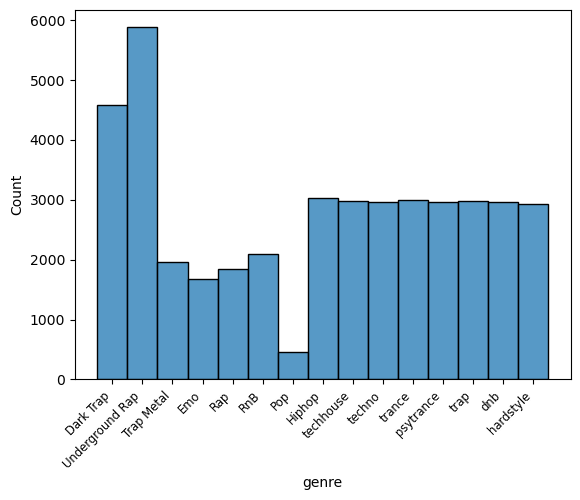

In [13]:
sns.histplot(data=songs_df, x='genre')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

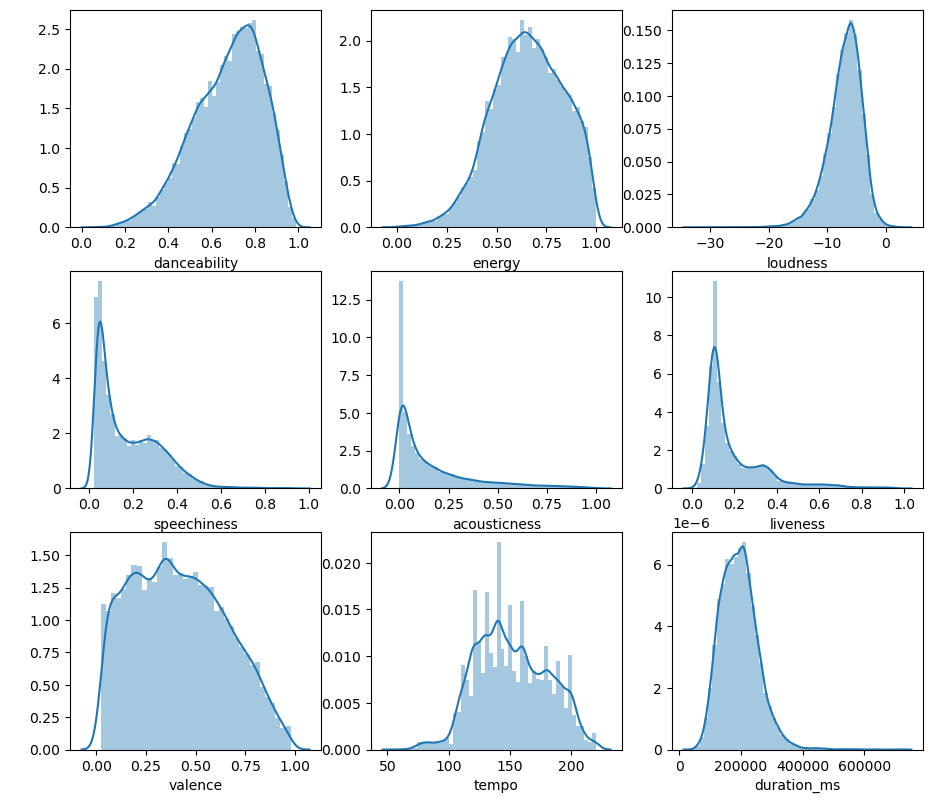

In [75]:
plt.rcParams['figure.figsize'] = [11, 13]
i = 1
for column in q_df.columns:
    plt.subplot(4,3,i)
    plt.ylabel(' ')
#     plt.figure()
    sns.distplot(df[column])
    i += 1
    
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

## Nearest Neighbors

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [66]:
# standard scaler removes the mean and scales to unit variance for each feature
scaler = StandardScaler()
scaler.fit(q_df)
scaled_df = scaler.transform(q_df)
# df_s[0]

In [67]:
# Instantiate nearest-neighbors estimator, n_neighbors is Number of neighbors to use by default for kneighbors queries.
neigh = NearestNeighbors(n_neighbors=5)
# fit to our song's audio features
neigh.fit(scaled_df)

NearestNeighbors()

In [68]:
# pickle.dump(scaler, open('sclr.pkl', 'wb'))

In [69]:
# pickle.dump(neigh, open('knn.pkl', 'wb'))

In [46]:
# sclr = pickle.load(open('sclr.pkl', 'rb'))
# knn = pickle.load(open('knn.pkl', 'rb'))

## Testing out getting audio features from spotify api

In [27]:

#'ffd61f80a4dd4d7c8fc0c289d994fec0' '4d2e3a2dc89c45be83eaa5083b9b1b48'

CLIENT_ID = 'ffd61f80a4dd4d7c8fc0c289d994fec0' 
CLIENT_SECRET = '4d2e3a2dc89c45be83eaa5083b9b1b48'

In [28]:
def get_nn_query(track_id):
    # get access token
    AUTH_URL = 'https://accounts.spotify.com/api/token'
    # POST
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
    })

    # convert the response to JSON
    auth_response_data = auth_response.json()
    # save the access token
    access_token = auth_response_data['access_token']

    # GET song audio-features
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}
    r = requests.get('https://api.spotify.com/v1/audio-features/' + track_id, headers=headers)
    song_dict = r.json()
    
    # put audio attributes in same order as in the dataframe the estimator is fit to.
    query_nn = [song_dict[x] for x in q_df.columns]
    
    return query_nn

In [29]:
# test get_nn_query()
test_q = get_nn_query(uri)
print(q_df.columns)
print(test_q)

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')
[0.752, 0.678, -5.421, 1, 0.0646, 0.085, 0.13, 0.583, 96.009, 231827]


In [62]:
def query_nn_explicit(song_features):
    scaler = StandardScaler()
    scaler.fit(q_df)
    # scale features
    scaled_df = scaler.transform(q_df)
    scaled_song = scaler.transform([song_features])
    print(scaled_song)
    
    # get 5 nearest neighbors, returns a list of dataframe indices
    neigh = NearestNeighbors(n_neighbors=5)
    neigh.fit(scaled_df)
    nearest_five = neigh.kneighbors(scaled_song, 5, return_distance=False)
    
    return nearest_five

In [70]:
def query_nn_pickles(song_features):
    # load pkls from current directory
    sclr = pickle.load(open('sclr.pkl', 'rb'))
    knn = pickle.load(open('knn.pkl', 'rb'))
    # scale features
    scaled = sclr.transform([song_features])
    print(scaled)
    # get 5 nearest neighbors, returns a list of dataframe indices
    similar_five = knn.kneighbors(scaled, 5, return_distance=False)
    
    return similar_five

In [31]:
#test query_nn
query_nn(test_q)

array([[19531,  2372, 18973, 19742,  5883]])

## Nice Function(does all things)

In [71]:
def recomend(song_link):
    # Slice uri out of spotify share link
    uri = song_link[31:53]
    # Request song audio-features and format them for nearest-neighbors query
    features = get_nn_query(uri)
    
    # get nearest neighbors
    similar_songs = query_nn_pickles(features)
    print(similar_songs)
    
    
    # create links to spotify songs
    query_results = songs_df.loc[similar_songs[0]]['uri']
    links = query_results.apply(lambda x: 'https://open.spotify.com/track/' + x[14:]).values
    
    return links

### test recomend()

In [43]:
bicep = 'https://open.spotify.com/track/73X9X7kDgsm4YeHpc8prf6?si=4acf2fa8d0314a23'
norah_jones = 'https://open.spotify.com/track/4yZYolqyUgoGxSCoKZuYjN?si=ed3dc2c70fd84d19'

In [73]:
# Test recomend()
recomend(bicep)

[[ 0.90587124 -0.33151311  0.08999668 -0.98881413  0.86218114 -0.74192359
   0.30643882 -0.80636017  0.86103926]]
[[ 4212 16970  7897 21015 17341]]


array(['https://open.spotify.com/track/2TUHiFBDBpGyDUCTMA3TMH',
       'https://open.spotify.com/track/2KqyIbbCPKhNfqqzUVq9H9',
       'https://open.spotify.com/track/6br4Pc0BzU6dTD5fEmks2i',
       'https://open.spotify.com/track/4mqsYvyMATKLBPwRd3xGnM',
       'https://open.spotify.com/track/4uX8Wh4wxpLne11BhoHs5x'],
      dtype=object)

In [74]:
recomend(norah_jones)

[[ 0.40406392 -2.6079247  -1.62511761 -1.06702531  3.40481288 -0.89971214
   0.9140498  -2.16272293 -0.13849647]]
[[10356 12619 14160 13491 19614]]


array(['https://open.spotify.com/track/12whwTqw8VxC5DyUM6T9xM',
       'https://open.spotify.com/track/2tQWm5Xvo87waN5CZmNm9f',
       'https://open.spotify.com/track/7AFASza1mXqntmGtbxXprO',
       'https://open.spotify.com/track/63nJIngH6cMV70V5IUx3Ex',
       'https://open.spotify.com/track/7AQim7LbvFVZJE3O8TYgf2'],
      dtype=object)

In [59]:
bq = get_nn_query(bicep[31:53])
bq

[0.819, 0.599, -6.778, 0.039, 0.347, 0.083, 0.489, 127.986, 246507]

In [60]:
nq = get_nn_query(norah_jones[31:53])
nq

[0.739, 0.199, -11.763, 0.028, 0.877, 0.0591, 0.631, 88.466, 186160]

In [63]:
query_nn_explicit(bq)

[[ 0.90587124 -0.33151311  0.08999668 -0.98881413  0.86218114 -0.74192359
   0.30643882 -0.80636017  0.86103926]]


array([[ 4212, 16970,  7897, 21015, 17341]])

In [64]:
query_nn_explicit(nq)

[[ 0.40406392 -2.6079247  -1.62511761 -1.06702531  3.40481288 -0.89971214
   0.9140498  -2.16272293 -0.13849647]]


array([[10356, 12619, 14160, 13491, 19614]])